In [1]:
import numpy as np
import pandas as pd

In [2]:
training_df = pd.read_csv('data/training_data_filled_11.09.csv')
training_df = training_df.dropna(subset=['penalty_reduction_ratio'])

<Axes: >

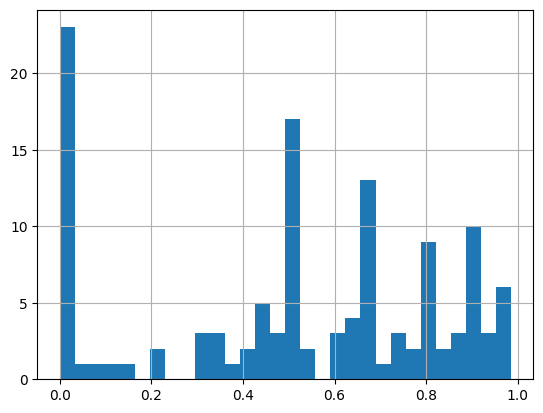

In [3]:
training_df.penalty_reduction_ratio.hist(bins=30)

### Переводим категориальные данные в one-hot вектора

In [4]:
def transform_into_onehot(column_name, df):
    encoding_dict = {
        c: i for (i, c) in enumerate(df[column_name].unique())
    }
    encoded = np.zeros((len(df), len(encoding_dict)))
    for i, val in enumerate(df[column_name]):
        one_place = encoding_dict[val]
        encoded[i][one_place] = 1
    return encoded

In [5]:
encoded_type_of_contract = transform_into_onehot('type_of_contract', training_df)
encoded_appeal_courts = transform_into_onehot('appeal_courts', training_df)
encoded_judge_gender = transform_into_onehot('judge_gender', training_df)
encoded_year = transform_into_onehot('year', training_df)

#### Собираем признаки воедино

In [6]:
features = training_df[['claimed_penalty', 'contract_penalty_percentage', 'contract_price', 'delay']].values
features = np.hstack([features, encoded_type_of_contract, encoded_appeal_courts, encoded_judge_gender, encoded_year])

### LinearRegression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    features, training_df.penalty_reduction_ratio, test_size=0.25, random_state=42)

In [9]:
X_train.shape[0], X_test.shape[0]

(93, 31)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
pred = lr.predict(X_test)

In [12]:
metrics.mean_squared_error(y_test, pred)

0.7082288326784026

In [13]:
metrics.mean_absolute_error(y_test, pred)

0.499745842534087

In [14]:
results = pd.DataFrame({'real': y_test, 'predicted': pred})
results

,real,predicted
18,0.655589,1.196374
42,0.750000,0.538304
36,0.000000,0.255630
76,0.645927,0.571624
53,0.000000,-0.048961
90,0.857521,1.016861
56,0.000000,-2.107490
123,0.334085,1.872612
122,0.666667,0.514135
4,0.445643,0.633505


### DecisionTreeRegressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
dt = DecisionTreeRegressor()

In [17]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
pred = dt.predict(X_test)

In [19]:
metrics.mean_squared_error(y_test, pred)

0.14234993641229834

In [20]:
metrics.mean_absolute_error(y_test, pred)

0.23678156727190092

In [21]:
results = pd.DataFrame({'real': y_test, 'predicted': pred})
results

,real,predicted
18,0.655589,0.666669
42,0.750000,0.941292
36,0.000000,0.000000
76,0.645927,0.500000
53,0.000000,0.000000
90,0.857521,0.885592
56,0.000000,0.000000
123,0.334085,0.904324
122,0.666667,0.666691
4,0.445643,0.384481
